In [150]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



![img](https://github.com/yandexdataschool/nlp_course/raw/master/resources/banhammer.jpg)

__In this notebook__ you will build an algorithm that classifies social media comments into normal or toxic.
Like in many real-world cases, you only have a small (10^3) dataset of hand-labeled examples to work with. We'll tackle this problem using both classical nlp methods and embedding-based approach.

### Read the comments.tsv with tab separator. 
#### Choose the "should_ban" feature as the target.

In [151]:
import pandas as pd

# <Your code Goes Here>
data = pd.read_csv('comments.tsv', sep='\t')
texts = data['comment_text'].values
target = data['should_ban'].values
data[50::200]

,should_ban,comment_text
50,0,"""Those who're in advantageous positions are th..."
250,1,Fartsalot56 says f**k you motherclucker!!
450,1,"Are you a fool? \n\nI am sorry, but you seem t..."
650,1,I AM NOT A VANDAL!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
850,0,Citing sources\n\nCheck out the Wikipedia:Citi...


### Split the dataset into training and test sets: 50/50
#### Do not forget to stratify the split, cause we are solving a classification problem.

In [152]:
# <Your code Goes Here>
from sklearn.model_selection import train_test_split

texts_train, texts_test, y_train, y_test = train_test_split(texts, target, stratify=target, test_size=0.4, random_state=42)

In [153]:
print(X_train)
y_train

0      The picture on the article is not of the actor...
1      Its madness. Shes of Chinese heritage, but JAP...
2      Fuck You. Why don't you suck a turd out of my ...
3      God is dead\nI don't mean to startle anyone bu...
4      THIS USER IS A PLANT FROM BRUCE PERENS AND GRO...
                             ...                        
195    , and welcome to Wikipedia! Thank you for your...
196    FundRasing my Ass. \n\nSetting aside the proty...
197    I HAVE NO LIFE, AND IF I DON'T GET TO EVER HAV...
198    Yes, complain to your rabbi and then go shoot ...
199    You watch me, soon your I.P Address will be ba...
Name: comment_text, Length: 200, dtype: object


array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,

__Note:__ it is generally a good idea to split data into train/test before anything is done to them.

It guards you against possible data leakage in the preprocessing stage. For example, should you decide to select words present in obscene tweets as features, you should only count those words over the training set. Otherwise your algoritm can cheat evaluation.

### Preprocessing and tokenizationv

Comments contain raw text with punctuation, upper/lowercase letters and even newline symbols.

To simplify all further steps, we'll split text into space-separated tokens using one of nltk tokenizers.

Do not forget to lowercase the words before tokenization, cause we want to generate case insensitive tokens.

In [154]:
from nltk import word_tokenize
X_train.head()

0    The picture on the article is not of the actor...
1    Its madness. Shes of Chinese heritage, but JAP...
2    Fuck You. Why don't you suck a turd out of my ...
3    God is dead\nI don't mean to startle anyone bu...
4    THIS USER IS A PLANT FROM BRUCE PERENS AND GRO...
Name: comment_text, dtype: object

In [155]:
from nltk.tokenize import TweetTokenizer

# <Your code Goes Here>
tokenizer = TweetTokenizer()
preprocess = lambda text: ' '.join(tokenizer.tokenize(text.lower()))

text = 'How to be a grown-up at work: replace "fuck you" with "Ok, great!".'

print("before:", text)
print("after:", preprocess(text))

before: How to be a grown-up at work: replace "fuck you" with "Ok, great!".
after: how to be a grown-up at work : replace " fuck you " with " ok , great ! " .


### Preprocess each comment in train and test

In [156]:
# <Your code Goes Here>
import nltk
from nltk import word_tokenize
from spellchecker import SpellChecker
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag
from nltk.stem import PorterStemmer
import re

en_stopwords = stopwords.words('english')

def tokenize(text):
    return lambda text: ' '.join(tokenizer.tokenize(text.lower()))

def remove_whitespace(text):
    return  " ".join(text.split())

def spell_check(text):
    
    result = []
    spell = SpellChecker()
    for word in text:
        correct_word = spell.correction(word)
        result.append(correct_word)
    
    return result

def remove_stopwords(text):
    result = []
    for token in text:
        if token not in en_stopwords:
            result.append(token)
            
    return result


def remove_punct(text):
    
    tokenizer = RegexpTokenizer(r"\w+")
    lst=tokenizer.tokenize(' '.join(text))
    return lst


def frequent_words(df):
    
    lst=[]
    for text in df.values:
        lst+=text[0]
    fdist=FreqDist(lst)
    return fdist.most_common(10)


def lemmatization(text):
    
    result=[]
    wordnet = WordNetLemmatizer()
    for token,tag in pos_tag(text):
        pos=tag[0].lower()
        
        if pos not in ['a', 'r', 'n', 'v']:
            pos='n'
            
        result.append(wordnet.lemmatize(token,pos))
    
    return result


def stemming(text):
    porter = PorterStemmer()
    
    result=[]
    for word in text:
        result.append(porter.stem(word))
    return result


def remove_tag(text):
    
    text=' '.join(text)
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)


def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)



def preprocess_v2(text):
    text = tokenize(text)
    text = text.lower()
    text = remove_whitespace(text)
    text = spell_check(text.split())
    text = remove_stopwords(text)
    text = remove_punct(text)
    text = lemmatization(text)
    text = stemming(text)
    text = remove_tag(text)
    text = remove_urls(text)
    return text

lst = []

def remove_freq_words(text):
    
    result=[]
    for item in text:
        if item not in lst:
            result.append(item)
    
    return result

def preprocessData(data):
    data = data.str.lower()
    data = data.apply(remove_whitespace)
    data = data.apply(lambda X: word_tokenize(X))
#     data = data.apply(spell_check)
    data = data.apply(remove_stopwords)
    data = data.apply(remove_punct)
    freq_words = frequent_words(data)
    
    for a,b in freq_words:
        lst.append(b)
        
    data = data.apply(remove_freq_words)
#     data = data.apply(lemmatization)
    data = data.apply(stemming)
    data = data.apply(remove_tag)
    data = data.apply(remove_urls)
    data = data.apply(remove_whitespace)
    return data


print(texts_train[:2])
print(texts_test)
texts_train = np.array([preprocess(comment) for comment in texts_train])
texts_test = np.array([preprocess(comment) for comment in texts_test])
# texts_train = preprocessData(texts_train)
# texts_test = preprocessData(texts_test)
print(texts_train)
print(texts_test)

['Hey man, I think you are cool. I loved it when you reported that idiot Dark-Hooded dufus. Anyway, should we be best friends here?User:Pic Business'
 "I attempted some changes in punctuation and grammar. Hopefully I didn't change the meaning of the translation. Thanks for providing the reference."]
["Megadeth album article\nThis clearly isn't the first time you've made your own unconstructive edits. Put your goggles back on you nerd and sort yourself out. My edit was perfectly valid. Suck on it."
 '"\n\n RE: Special:UnwatchedPages \n\nHey, finally someone graps what I mean, and the fact that we need to get it opened up. Have you any idea where we can take this to get the ball rolling? littleirish "'
 "Oh Sh*t! I'm shaking in my boots, big bad admin! Get off my nuts, bitch."
 "THIS USER IS A PLANT FROM BRUCE PERENS AND GROKLAW \n\nRevoke his rights and ban him  he's an infiltrator."
 "I'm sorry, but I have only been reacting to other comments made to me about me being a 'communist' etc

['hey man , i think you are cool . i loved it when you reported that idiot dark-hooded dufus . anyway , should we be best friends here ? user :p ic business'
 "i attempted some changes in punctuation and grammar . hopefully i didn't change the meaning of the translation . thanks for providing the reference ."
 'o wait i r just a big ideot wid a psp slim i r so dumb !'
 "i had not seen that actually . this user is really a curious case , not sure what the user's angle is . i think we may have actually declined the same csds , and i'm assuming it was accidental that you reverted my other changes to the pages as well ? . otherwise , i'm not sure why you'd remove a reference i added and reinstate an unsourced section about a person's penis ."
 "would you do me a favor and stop fucking with my information . i don't know what your problem with me is , i am not a therapist , but i really think you need to take care of your own control issues . by the way you are neither a gentleman or a ghost

In [160]:
texts_train[3]

"i had not seen that actually . this user is really a curious case , not sure what the user's angle is . i think we may have actually declined the same csds , and i'm assuming it was accidental that you reverted my other changes to the pages as well ? . otherwise , i'm not sure why you'd remove a reference i added and reinstate an unsourced section about a person's penis ."

In [158]:
texts_train[5]

"wait wait wait ... there's still doubt that the egalitarian agenda of left-libertarianism does not entail a redistribution of wealth ? how on earth is a left-libertarian society supposed to achieve its egalitarian goal if it doesn't redistribute the wealth ? / facepalm"

In [159]:
assert texts_train[3] ==  'butts screw my butthole mr krabs'
assert texts_test[5] == ', 21 april 2008 ( utc ) what the fuck are you talking about ? 11:47'
assert len(texts_test) == len(y_test)

AssertionError: 

### Solving it: bag of words

![img](http://www.novuslight.com/uploads/n/BagofWords.jpg)

One traditional approach to such problem is to use bag of words features:
1. build a vocabulary of frequent words (use train data only)
2. for each training sample, count the number of times a word occurs in it (for each word in vocabulary).
3. consider this count a feature for some classifier

__Note:__ in practice, you can compute such features using sklearn. Please don't do that in the current assignment, though.
* `from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer`

#### task: find up to k most frequent tokens in texts_train,
#### sort them by number of occurences (highest first)

In [161]:
from keras.preprocessing.text import Tokenizer

sentence = ["John likes to watch movies. Mary likes movies too."]

def print_bow(sentence) -> None:
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentence)
    sequences = tokenizer.texts_to_sequences(sentence)
    word_index = tokenizer.word_index 
    bow = {}
    for key in word_index:
        bow[key] = sequences[0].count(word_index[key])

    print(f"Bag of word sentence 1:\n{bow}")
    print(f'We found {len(word_index)} unique tokens.')

print_bow(sentence)

Bag of word sentence 1:
{'likes': 2, 'movies': 2, 'john': 1, 'to': 1, 'watch': 1, 'mary': 1, 'too': 1}
We found 7 unique tokens.


In [162]:
from collections import Counter
counter = [Counter(re.findall(r'\w+', txt)) for txt in texts_train]


counter[5]

Counter({'wait': 3,
         'there': 1,
         's': 1,
         'still': 1,
         'doubt': 1,
         'that': 1,
         'the': 2,
         'egalitarian': 2,
         'agenda': 1,
         'of': 2,
         'left': 2,
         'libertarianism': 1,
         'does': 1,
         'not': 1,
         'entail': 1,
         'a': 2,
         'redistribution': 1,
         'wealth': 2,
         'how': 1,
         'on': 1,
         'earth': 1,
         'is': 1,
         'libertarian': 1,
         'society': 1,
         'supposed': 1,
         'to': 1,
         'achieve': 1,
         'its': 1,
         'goal': 1,
         'if': 1,
         'it': 1,
         'doesn': 1,
         't': 1,
         'redistribute': 1,
         'facepalm': 1})

In [163]:
from collections import Counter # <- use me 

k = 10000

vocabulary = Counter(dict())
add_to_vocabulary = lambda tokens, occurances: vocabulary.update(Counter(dict(zip(tokens, occurances))))

for comment in texts_train:
    tokens, occurances = np.unique(comment.split(), return_counts=True)
    add_to_vocabulary(tokens, occurances)

bow_vocabulary = list(dict(sorted(vocabulary.items(), key=lambda item: item[1], reverse=True)).keys())

print('example features:', sorted(bow_vocabulary)[::100])

example features: ['!', '17:36', '30stm', '?', 'administrative', 'alot', 'applied', 'atrosity', 'bats', 'blair', "brother's", 'caressed', 'chosen', 'commercial', 'containing', 'crazy', 'debunk', 'dialogue', 'documentation', 'eding', 'entire', 'experiment', 'feelings', 'forgive', 'gag', 'gorn', 'harass', 'hippo', 'hugo', 'inappropriate', 'intro', 'judging', 'law', 'lives', 'manipulate', 'meta', 'morisot', 'nemonic', 'nus', 'organization', 'people', 'playing', 'previous', 'puerile', 'reach', 'regualrly', 'resulted', 'rushton', 'self-intersect', 'signatories', 'solely', 'starting', 'suckin', 'talkng', 'thighs', 'towards', 'unapologetic', 'useless', 'voting', 'whistles', "wpbs's", 'கட்டுரைகள்']


In [164]:
def text_to_bow(text):
    """ convert text string to an array of token counts. Use bow_vocabulary. """
#     <YOUR CODE>
    word_vec = text.split()
    token_counts = [word_vec.count(word) if word in word_vec else 0 for word in bow_vocabulary]
    
    return np.array(token_counts, 'float32')

In [165]:
X_train_bow = np.stack(list(map(text_to_bow, texts_train)))
X_test_bow = np.stack(list(map(text_to_bow, texts_test)))

In [166]:
np.array(X_train_bow[0])

array([2., 2., 2., ..., 0., 0., 0.], dtype=float32)

In [167]:
X_test_bow

array([[4., 0., 1., ..., 0., 0., 0.],
       [1., 2., 1., ..., 0., 0., 0.],
       [1., 2., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [168]:
k_max = len(set(' '.join(texts_train).split()))
assert X_train_bow.shape == (len(texts_train), min(k, k_max))
assert X_test_bow.shape == (len(texts_test), min(k, k_max))
assert np.all(X_train_bow[5:10].sum(-1) == np.array([len(s.split()) for s in  texts_train[5:10]]))
assert len(bow_vocabulary) <= min(k, k_max)
assert X_train_bow[6, bow_vocabulary.index('.')] == texts_train[6].split().count('.')

In [169]:
X_train_bow.shape

(600, 6149)

In [170]:
y_train.shape

(600,)

Machine learning stuff: fit, predict, evaluate. You know the drill.

In [171]:
from sklearn.linear_model import LogisticRegression

bow_model = LogisticRegression(random_state=10).fit(X_train_bow, y_train)

In [172]:
y.shape

(200,)

[9.55553122e-01 7.95278971e-02 9.32202484e-01 2.88995415e-02
 9.99301679e-01 3.82424013e-02 9.09702866e-01 1.08599940e-01
 1.37403337e-02 3.02337006e-02 3.25675188e-02 9.22845852e-01
 9.75598300e-01 1.71947818e-01 9.69854949e-01 9.61561099e-01
 1.88936464e-01 9.84335411e-02 2.59381654e-01 3.01376074e-02
 9.98822166e-01 9.81231337e-01 4.37687683e-03 9.74777591e-01
 9.93582711e-01 2.32229098e-03 9.89510776e-01 1.01725231e-02
 9.99999556e-01 2.08167468e-01 8.86279853e-01 9.69028327e-01
 9.08561367e-01 9.46145730e-01 8.99129683e-01 9.01544517e-01
 9.36584878e-01 2.10096660e-02 1.25448748e-01 9.50104297e-01
 6.18769438e-02 1.99096936e-01 1.05627536e-01 9.97172018e-01
 9.56500063e-01 3.40452035e-02 1.44109492e-01 1.00000000e+00
 9.48974537e-01 9.98184511e-01 1.21502315e-01 9.66157384e-01
 9.89070118e-01 7.61091863e-01 9.67088604e-01 8.00029806e-01
 2.52263257e-07 9.99993537e-01 9.57058698e-01 9.32172197e-01
 7.82637333e-01 9.60770671e-01 1.16585063e-03 9.78398905e-01
 9.92468895e-01 9.759495

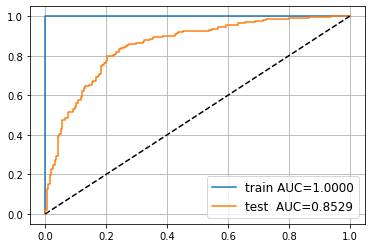

In [173]:
from sklearn.metrics import roc_auc_score, roc_curve

for name, X, y, model in [
    ('train', X_train_bow, y_train, bow_model),
    ('test ', X_test_bow, y_test, bow_model)
]:
    proba = model.predict_proba(X)[:, 1]
    print(proba)
    print(y)
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

### Solving it better: word vectors

Let's try another approach: instead of counting per-word frequencies, we shall map all words to pre-trained word vectors and average over them to get text features.

This should give us two key advantages: (1) we now have 10^2 features instead of 10^4 and (2) our model can generalize to word that are not in training dataset.

We begin with a standard approach with pre-trained word vectors. However, you may also try
* training embeddings from scratch on relevant (unlabeled) data
* multiplying word vectors by inverse word frequency in dataset (like tf-idf).
* concatenating several embeddings
    * call `gensim.downloader.info()['models'].keys()` to get a list of available models
* clusterizing words by their word-vectors and try bag of cluster_ids

__Note:__ loading pre-trained model may take a while. It's a perfect opportunity to refill your cup of tea/coffee and grab some extra cookies. Or binge-watch some tv series if you're slow on internet connection

In [174]:
# !pip install python-Levenshtein

In [175]:
import gensim.downloader 
embeddings = gensim.downloader.load("fasttext-wiki-news-subwords-300")

# If you're low on RAM or download speed, use "glove-wiki-gigaword-100" instead. Ignore all further asserts.

In [176]:
def vectorize_sum(comment, embedding_dim):
    """
    implement a function that converts preprocessed comment to a sum of token vectors
    """
#     embedding_dim = embeddings.wv.vectors.shape[1] # AttributeError: 'KeyedVectors' object has no attribute 'wv'
    keys = embeddings.index_to_key
    does_not_exist = np.zeros([embedding_dim], dtype='float32')
    features = sum([embeddings.get_vector(word) if word in keys else does_not_exist for word in comment.split()])
    
    return features

assert np.allclose(
    vectorize_sum(comment="who cares anymore . they attack with impunity .", embedding_dim=300)[::70],
    np.array([ 0.0108616 ,  0.0261663 ,  0.13855131, -0.18510573, -0.46380025])
)

In [177]:
extra = "'"
preprocess = lambda text: ' '.join([word.split(extra)[0] if extra in word else word for word in text.split()])
        
texts_test = np.array([preprocess(text) for text in texts_test])
texts_train = np.array([preprocess(text) for text in texts_train])

In [178]:
X_train_wv = np.stack([vectorize_sum(comment=text, embedding_dim=300) for text in texts_train])
X_test_wv = np.stack([vectorize_sum(comment=text, embedding_dim=300) for text in texts_test])

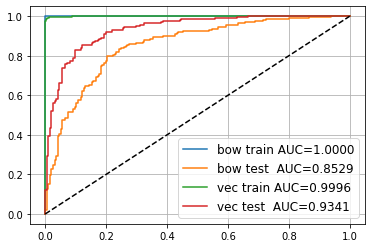

In [179]:
wv_model = LogisticRegression(max_iter=1000).fit(X_train_wv, y_train)

for name, X, y, model in [
    ('bow train', X_train_bow, y_train, bow_model),
    ('bow test ', X_test_bow, y_test, bow_model),
    ('vec train', X_train_wv, y_train, wv_model),
    ('vec test ', X_test_wv, y_test, wv_model)
]:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

assert roc_auc_score(y_test, wv_model.predict_proba(X_test_wv)[:, 1]) > 0.92, "something's wrong with your features"

If everything went right, you've just managed to reduce misclassification rate by a factor of two.
This trick is very useful when you're dealing with small datasets. However, if you have hundreds of thousands of samples, there's a whole different range of methods for that. We'll get there in the second part.